# Tienen orden las variables? 

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import sidetable

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

#Para poder cambiar fechas
# ----------------------------------------------------------------------
from datetime import date, datetime
import calendar
import holidays

In [6]:
df = pd.read_pickle('../datos/01-bikes_sin_outliers.pickle')
df.head(2)

instant      dteday  season   yr  mnth  holiday  weekday  workingday  \
0      1.0  01-01-2018  spring  0.0   1.0      0.0      6.0         0.0   
1      2.0  02-01-2018  spring  0.0   1.0      0.0      0.0         0.0   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0         2.0  14.110847  18.18125  80.5833  10.749882   331.0       654.0   
1         2.0  14.902598  17.68695  69.6087  16.652113   131.0       670.0   

     cnt  
0  985.0  
1  801.0

# Variables : 

- instant	
- dteday	
- season	
- yr	
- mnth	
- holiday	
- weekday	
- workingday	
- weathersit	
- temp	
- atemp	
- hum	
- windspeed	
- casual	
- registered	
- cnt

- Si las variables categóricas **NO tienen** orden usaremos: 

    - One-Hot Encoding

    - get_dummies
---
- Si las variables categóricas **tienen** orden usaremos: 

    - Label-Encoding

    - map

    - Ordinal-Encoding

R lineal :- Lo modelos de **regresión lineal** son aquellos en los que la variable respuesta es de tipo continua

    Variable Alquiler de bicis

- Los modelos de **regresión lógistica** son aquellos cuya variable respuesta será una variable de tipo categórica.
        
        RLogistica : Es registrado o no'

1. Son variables Similares? 

In [7]:
def similar_variables(lista_variables,plot = True):
    for columna in lista_variables:
        print(' Los valores únicos para la variable',columna, 'son:', list( df[columna].unique()))
        value_counts = df[columna].value_counts()
        if plot == True:
            plt.figure()
            plt.grid()
            mycolors = ['#4c9c85','#a0c6b9','#c8dbd5','#f1f1f1','#eed4f4','#e9b8f8','#e39afb']
            value_counts.plot.pie(figsize=(12,8), shadow = True,colors = mycolors,autopct='%1.1f%%',textprops=({'size': 'smaller','color':"w"}))
            
        else:
            pass

In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

 Los valores únicos para la variable season son: ['spring', 'summer', 'autumn', 'winter', nan]
 Los valores únicos para la variable mnth son: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, nan]


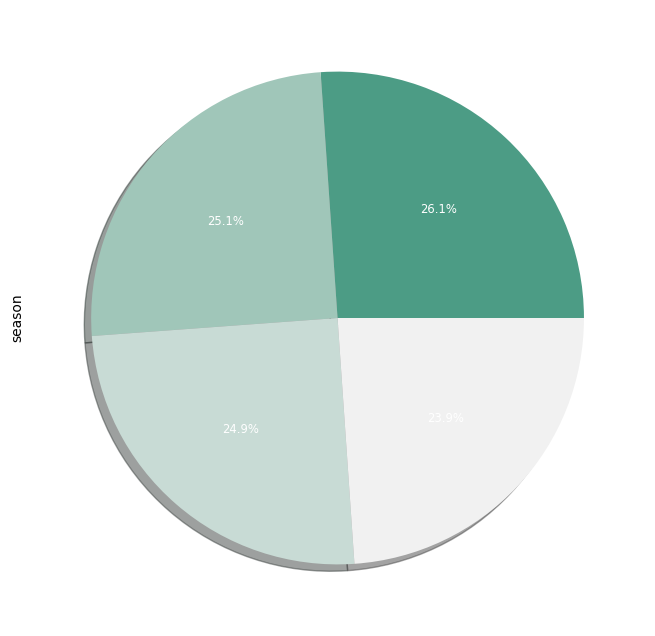

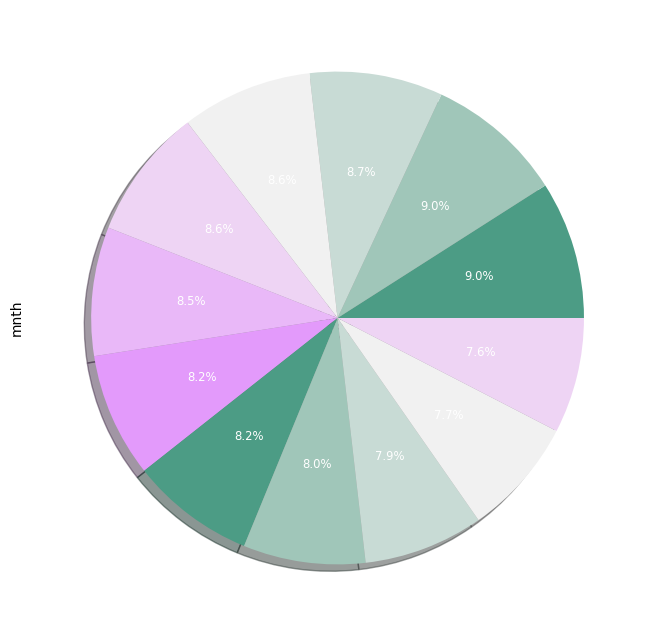

In [9]:
lista_columnas = ['season','mnth']
similar_variables(lista_columnas)

In [10]:
categoricas= df.select_dtypes(include='object')
categoricas.head(10)

dteday  season
0  01-01-2018  spring
1  02-01-2018  spring
2  03-01-2018  spring
3  04-01-2018  spring
4  05-01-2018  spring
5  06-01-2018  spring
6  07-01-2018  spring
7  08-01-2018  spring
8  09-01-2018  spring
9  10-01-2018  spring

No handles with labels found to put in legend.
No handles with labels found to put in legend.


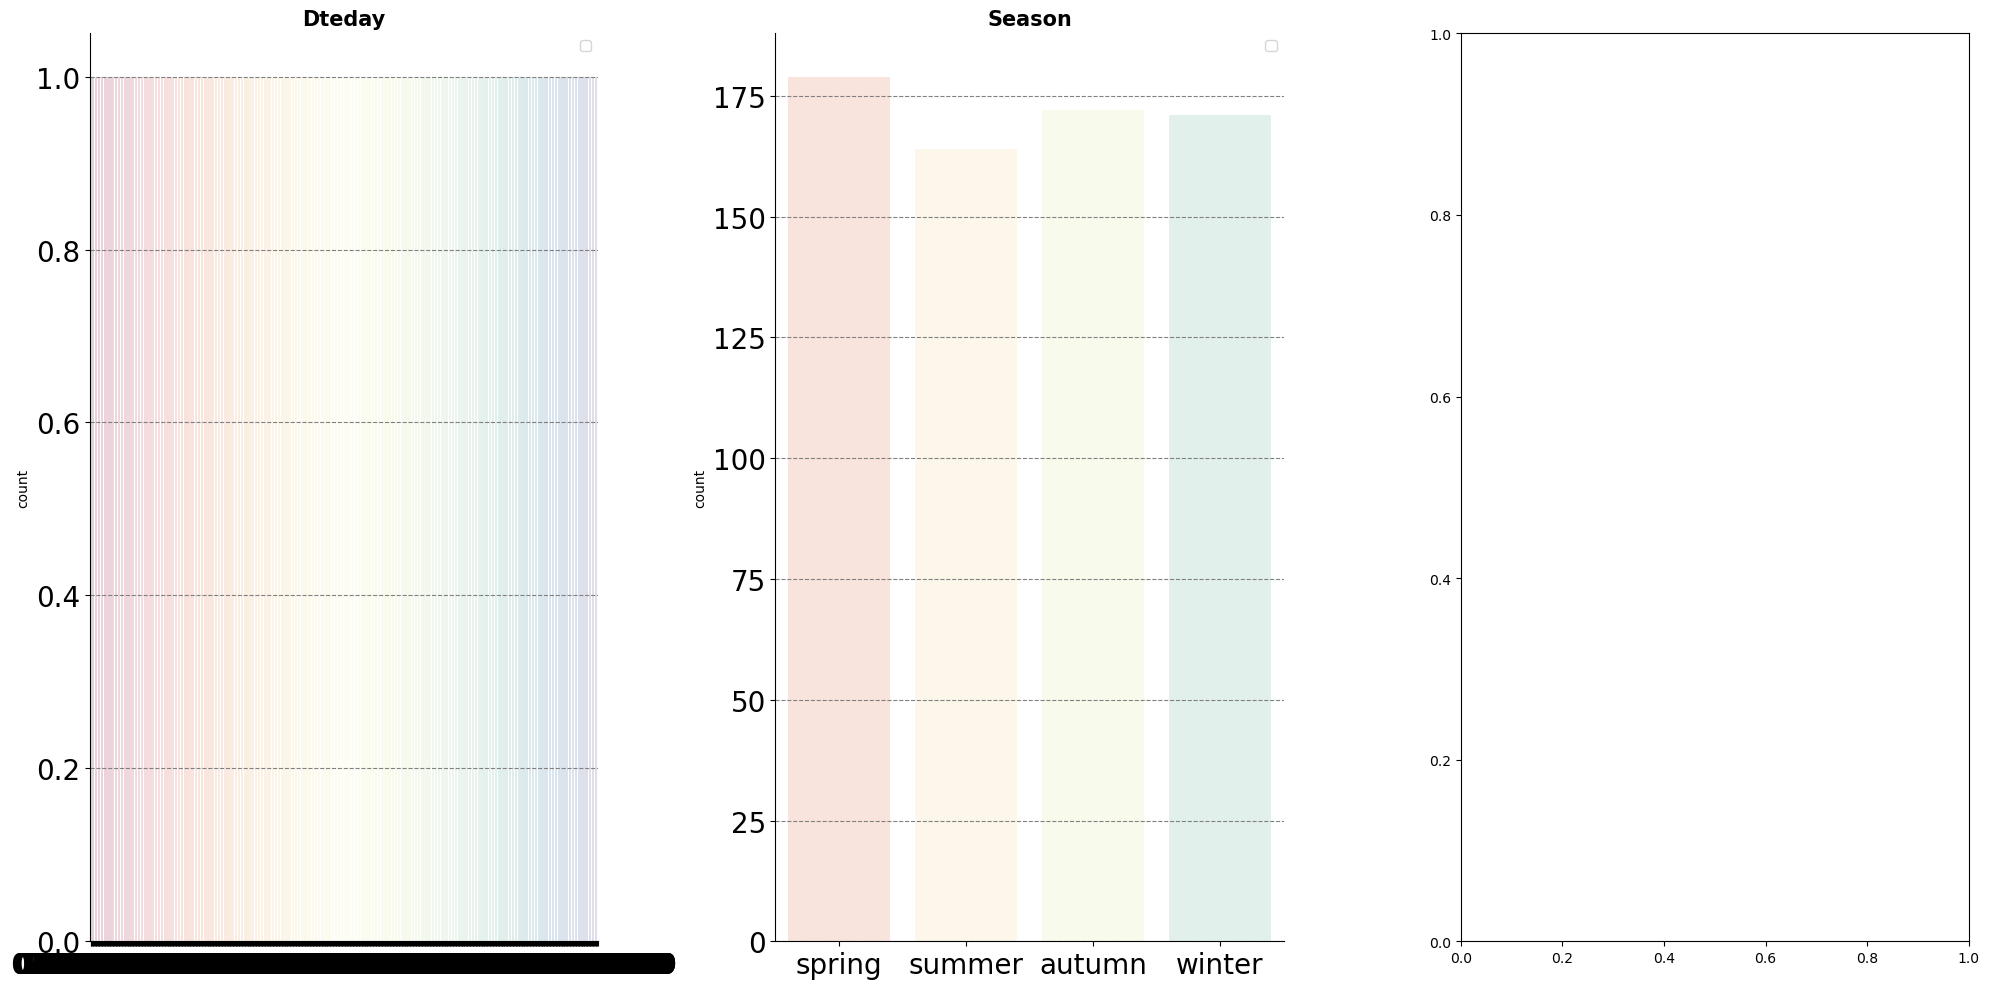

In [11]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,10))

axes = axes.flat
columnas_cat = categoricas.columns

for i, colum in enumerate(columnas_cat):
    sns.countplot(
        data = df,
        x = colum,
        #hue = "registered",
        alpha = 0.2,
        palette = 'Spectral', 
        ax = axes[i])
    
    
    axes[i].set_title(colum.capitalize(), fontsize = 15, fontweight = "bold")#titulos con letra mayuscula
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")
    axes[i].grid(axis = 'y', color = 'gray', linestyle = 'dashed')# pon el grid
    axes[i].spines['right'].set_visible(False)# borra los bordes
    axes[i].spines['top'].set_visible(False)

fig.tight_layout();

Primero saber los valores unicos

In [12]:
df.season.unique()

array(['spring', 'summer', 'autumn', 'winter', nan], dtype=object)

¿ el hecho de que sea invierno/verano/otoño/primavera puede hacer que el alquiler de las bicis por los registrados cambie significativamente? 
- A la vista de las graficas NO, por lo tanto la cariable tiene TIENE ORDEN

In [13]:
df.holiday.unique()

array([ 0., nan])

¿ el hecho de que sea festivo/no festivo puede hacer que el alquiler de las bicis por los registrados cambie significativamente? 
- A la vista de las graficas SI, por lo tanto la cariable tiene ORDEN


In [14]:
df.workingday.unique()

array([ 0.,  1., nan])

¿ el hecho de que sea laborable/finde puede hacer que el alquiler de las bicis por los registrados cambie significativamente? 
- A la vista de las graficas SI, por lo tanto la cariable tiene ORDEN

---

season - mnth = dependiente

season - holiday = dependiente

season - weathersit = dependiente

season - temp = dependiente

mnth - weathersit = dependiente

mnth - temp = dependiente

holiday - weekday = dependiente

weekday - workingday = dependiente

'weathersit', 'hum' = dependiente

temp - atemp = dependiente

temp- hum = dependiente

temp- windspeed = dependiente

hum - windspeed = dependiente

# No se guardan archivos

In [3]:
df2 = pd.read_pickle("../datos/02-bikes-limpio-con-outliers.pickle")

In [5]:
df2.head(2)

instant     dteday    season  yr  mnth     holiday weekday workingday  \
0        1 2018-01-01  invierno   0     1     festivo       1  laborable   
1        2 2018-01-02  invierno   0     1  no festivo       2  laborable   

  weathersit       temp     atemp      hum  windspeed  casual  registered  cnt  
0          2  14.110847  18.18125  80.5833  10.749882     331         654  985  
1          2  14.902598  17.68695  69.6087  16.652113     131         670  801

In [7]:
df2.describe().T

count         mean          std        min          25%  \
instant     730.0   365.500000   210.877136   1.000000   183.250000   
yr          730.0     0.500000     0.500343   0.000000     0.000000   
mnth        730.0     6.526027     3.450215   1.000000     4.000000   
temp        730.0    20.319259     7.506729   2.424346    13.811885   
atemp       730.0    23.726322     8.150308   3.953480    16.889713   
hum         730.0    62.765175    14.237589   0.000000    52.000000   
windspeed   730.0    12.763620     5.195841   1.500244     9.041650   
casual      730.0   849.249315   686.479875   2.000000   316.250000   
registered  730.0  3658.757534  1559.758728  20.000000  2502.250000   
cnt         730.0  4508.006849  1936.011647  22.000000  3169.750000   

                    50%          75%          max  
instant      365.500000   547.750000   730.000000  
yr             0.500000     1.000000     1.000000  
mnth           7.000000    10.000000    12.000000  
temp          20.465826    26.880615    35.328347  
atemp         24.368225    30.445775    42.044800  
hum           62.625000    72.989575    97.250000  
windspeed     12.125325    15.625589    34.000021  
casual       717.000000  1096.500000  3410.000000  
registered  3664.500000  4783.250000  6946.000000  
cnt         4548.500000  5966.000000  8714.000000

In [10]:
df_invierno= df2[df2['season']=='invierno']
df_invierno.shape

(180, 16)

In [9]:
df_invierno.describe().T

count         mean          std         min          25%  \
instant     180.0   261.611111   212.131544    1.000000    45.750000   
yr          180.0     0.500000     0.501395    0.000000     0.000000   
mnth        180.0     3.100000     3.412268    1.000000     1.000000   
temp        180.0    12.197035     4.221457    2.424346     9.114700   
atemp       180.0    14.831376     4.961332    3.953480    11.608738   
hum         180.0    58.167024    15.139273    0.000000    48.322900   
windspeed   180.0    14.387168     5.804831    3.042356    10.386993   
casual      180.0   336.427778   388.210074    9.000000   112.750000   
registered  180.0  2271.983333  1203.033760  416.000000  1378.250000   
cnt         180.0  2608.411111  1402.659942  431.000000  1536.000000   

                    50%          75%          max  
instant      365.500000   410.250000   730.000000  
yr             0.500000     1.000000     1.000000  
mnth           2.000000     3.000000    12.000000  
temp          11.706525    14.849124    23.472500  
atemp         14.125325    17.985650    27.430850  
hum           54.375000    69.339675    94.826100  
windspeed     13.596545    17.088668    34.000021  
casual       219.500000   424.000000  3155.000000  
registered  1869.000000  3168.250000  5315.000000  
cnt         2222.500000  3463.750000  7836.000000

In [19]:
df_invierno['atemp'].mode()

0    12.15290
1    16.28750
2    17.58145
Name: atemp, dtype: float64

In [20]:
df_invierno['hum'].mode()

0    39.5833
1    44.1250
2    53.7917
3    75.2917
4    77.5417
Name: hum, dtype: float64

In [21]:
df_invierno['windspeed'].mode()

0    10.792293
1    11.304642
2    24.250650
Name: windspeed, dtype: float64

---

In [11]:
df_verano= df2[df2['season']=='verano']
df_verano.shape

(188, 16)

In [12]:
df_verano.describe().T

count         mean          std          min          25%  \
instant     188.0   401.000000   184.998771   172.000000   218.750000   
yr          188.0     0.500000     0.501335     0.000000     0.000000   
mnth        188.0     7.691489     0.948137     6.000000     7.000000   
temp        188.0    28.958682     2.904749    19.235847    27.350413   
atemp       188.0    32.794920     3.602803    12.120000    30.926987   
hum         188.0    63.348206    11.934864    36.000000    55.083300   
windspeed   188.0    11.530366     3.988275     4.292744     8.781405   
casual      188.0  1202.611702   595.975032   118.000000   781.750000   
registered  188.0  4441.691489  1304.626949   889.000000  3477.250000   
cnt         188.0  5644.303191  1459.800381  1115.000000  4586.500000   

                    50%          75%          max  
instant      401.000000   583.250000   630.000000  
yr             0.500000     1.000000     1.000000  
mnth           8.000000     8.000000     9.000000  
temp          29.297903    30.758538    35.328347  
atemp         32.828750    34.904637    42.044800  
hum           63.500000    71.260425    93.956500  
windspeed     11.062705    14.000136    25.166339  
casual      1050.500000  1424.000000  3160.000000  
registered  4110.500000  5667.750000  6917.000000  
cnt         5353.500000  6929.250000  8714.000000

In [22]:
df_verano['atemp'].mode()

0    32.7344
Name: atemp, dtype: float64

In [23]:
df_verano['hum'].mode()

0    59.0417
Name: hum, dtype: float64

In [24]:
df_verano['windspeed'].mode()

0     8.666718
1     9.500332
2    10.125107
3    10.166714
4    13.417286
5    14.167418
6    15.333486
Name: windspeed, dtype: float64

---

In [13]:
df_primavera= df2[df2['season']=='primavera']
df_primavera.shape

(184, 16)

In [14]:
df_primavera.describe().T

count         mean          std         min          25%  \
instant     184.0   308.000000   184.925269   80.000000   125.750000   
yr          184.0     0.500000     0.501364    0.000000     0.000000   
mnth        184.0     4.652174     0.951671    3.000000     4.000000   
temp        184.0    22.320611     5.028649   10.374763    18.783115   
atemp       184.0    26.015366     5.401096   12.516950    22.482087   
hum         184.0    62.694833    15.284075   25.416700    50.093775   
windspeed   184.0    13.634978     4.799113    4.417256     9.864795   
casual      184.0  1106.097826   737.590829  120.000000   650.250000   
registered  184.0  3886.233696  1353.375628  674.000000  3012.500000   
cnt         184.0  4992.331522  1695.977235  795.000000  4003.000000   

                    50%          75%          max  
instant      308.000000   490.250000   536.000000  
yr             0.500000     1.000000     1.000000  
mnth           5.000000     5.000000     6.000000  
temp          23.045423    25.898347    33.141653  
atemp         26.910625    29.743375    37.878950  
hum           64.437500    74.166650    92.250000  
windspeed     13.000077    16.708259    26.000489  
casual       867.000000  1463.250000  3410.000000  
registered  3844.000000  4927.750000  6456.000000  
cnt         4941.500000  6377.000000  8362.000000

In [25]:
df_primavera['atemp'].mode()

0    22.50605
1    28.59875
2    28.72500
3    29.76730
Name: atemp, dtype: float64

In [26]:
df_primavera['hum'].mode()

0    45.6250
1    65.3750
2    67.6250
3    69.7083
4    72.9583
5    75.6667
6    83.5417
Name: hum, dtype: float64

In [27]:
df_primavera['windspeed'].mode()

0     6.834000
1     9.166739
2    10.958989
3    11.250104
4    13.875164
5    15.458575
6    16.791339
7    20.334232
Name: windspeed, dtype: float64

---

In [15]:
df_otoño= df2[df2['season']=='otoño']
df_otoño.shape

(178, 16)

In [18]:
df_otoño.describe().T

count         mean          std         min          25%  \
instant     178.0   492.500000   184.819235  266.000000   310.250000   
yr          178.0     0.500000     0.501410    0.000000     0.000000   
mnth        178.0    10.696629     0.919402    9.000000    10.000000   
temp        178.0    17.339148     4.421179    9.054153    13.581240   
atemp       178.0    20.776937     4.776784   11.395650    16.895000   
hum         178.0    66.871917    13.124796   33.347800    57.072925   
windspeed   178.0    11.523637     5.464839    1.500244     7.125450   
casual      178.0   729.112360   606.318118    2.000000   318.500000   
registered  178.0  3999.050562  1444.782557   20.000000  2974.500000   
cnt         178.0  4728.162921  1699.615261   22.000000  3615.500000   

                    50%          75%          max  
instant      492.500000   674.750000   719.000000  
yr             0.500000     1.000000     1.000000  
mnth          11.000000    11.000000    12.000000  
temp          16.775827    21.055222    26.957500  
atemp         20.469675    25.157550    30.398750  
hum           66.104200    75.687525    97.250000  
windspeed     11.188028    15.249870    28.292425  
casual       544.500000   922.000000  3031.000000  
registered  3815.000000  5075.500000  6946.000000  
cnt         4634.500000  5624.500000  8555.000000

In [28]:
df_otoño['atemp'].mode()

0    30.39875
Name: atemp, dtype: float64

In [29]:
df_otoño['hum'].mode()

0    52.4583
1    63.0833
2    63.6250
3    69.2917
4    73.3750
Name: hum, dtype: float64

In [30]:
df_otoño['windspeed'].mode()

0    7.12545
Name: windspeed, dtype: float64